<a href="https://colab.research.google.com/github/abou-zithar/AMIT.Machine.learning/blob/main/Drugs200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
# try some techniques to predict the outcome of the drugs that might be accurate for the patient.

# Content
# The target feature is
# Drug type
# The feature sets are:
# Age
# Sex
# Blood Pressure Levels (BP)
# Cholesterol Levels
# Na to Potassium Ration 'Sodium (Na) to Potassium (K) Ratio'

# dataset Drugs 200


In [185]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [186]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [187]:
filepath='/content/drive/MyDrive/amit /drug200.csv'
data=pd.read_csv(filepath)

In [188]:

data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [189]:
data.shape

(200, 6)

 `as we see there are 5 features and 200 row`

In [190]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [191]:
data['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [192]:
data['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [193]:
data['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

# the features:
<hr>
<ul>
<li>Sex => String (M,F) we can replace it with (0,1)

<li>BP=> Blood Pressure Levels string (High,Low,Normal)
<li>Cholesterol => Cholesterol Levels string(High,low)  we can replace it with (0,1)
<li> Na_to_K => Na to Potassium Ration is continuous value float
<li> Age
<ul/>

### target
<hr>
<li> Drug  =>Drug type (A,B,X,C,Y) string



In [194]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## there is no missing values in the data

<h1>  Visualization
<hr>

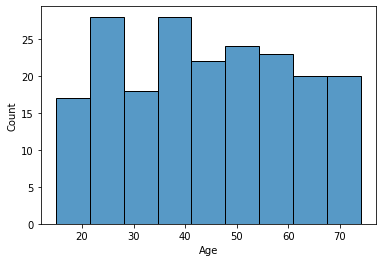

In [195]:
sns.histplot(data=data['Age'])

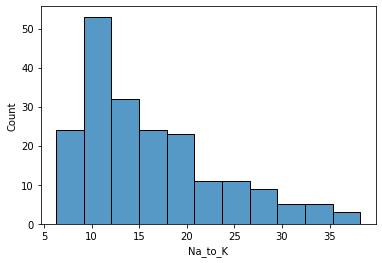

In [196]:
sns.histplot(data=data['Na_to_K'])

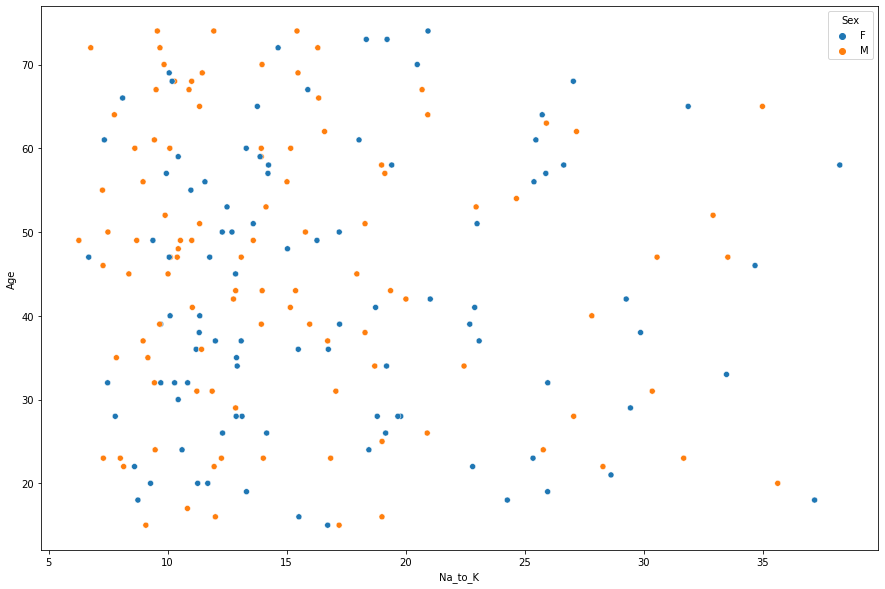

In [197]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Na_to_K", y="Age", data=data,hue='Sex');


## from the above plots 

<li> most of the na to k ration in range of 5 to 22.5
<li> the na to k ration in not commen  above this value

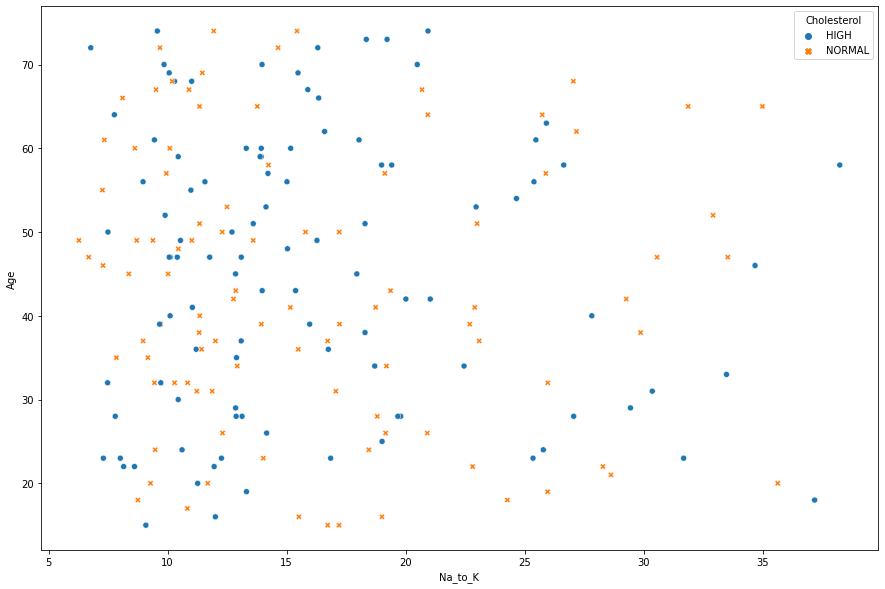

In [198]:

plt.figure(figsize=(15,10))

sns.scatterplot(x="Na_to_K", y="Age", data=data,hue='Cholesterol',style='Cholesterol');

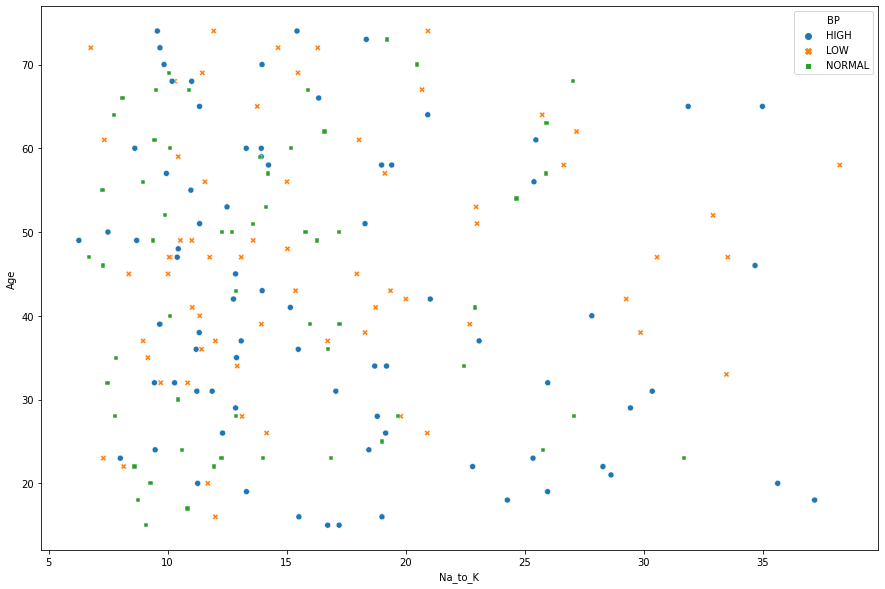

In [199]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Na_to_K", y="Age", data=data,hue='BP',style='BP',);

<h1> one_hot encoder

In [200]:
new_data=pd.get_dummies(data=data,columns=['Sex','Cholesterol','BP'],drop_first=True)

In [201]:
target=new_data['Drug']
new_data.drop(['Drug'],axis=1,inplace=True)

In [202]:
new_data['Drug']=target
new_data.head()

,Age,Na_to_K,Sex_M,Cholesterol_NORMAL,BP_LOW,BP_NORMAL,Drug
0,23,25.355,0,0,0,0,DrugY
1,47,13.093,1,0,1,0,drugC
2,47,10.114,1,0,1,0,drugC
3,28,7.798,0,0,0,1,drugX
4,61,18.043,0,0,1,0,DrugY


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


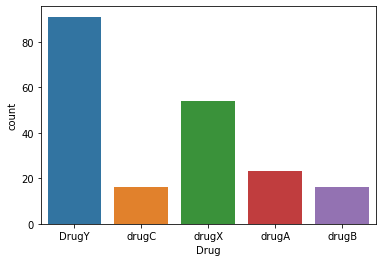

In [203]:
sns.countplot(new_data['Drug'])
# data is inbalanced so we will try to balance the data 

In [204]:
X = new_data.iloc[:,:-1]
y = new_data.iloc[:,-1]

In [205]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(sampling_strategy='all')
X_res,y_res=smk.fit_resample(X,y)
X_res.shape,y_res.shape

((443, 6), (443,))

# Label encoder

In [206]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [207]:
le.fit(y_res)

list(le.classes_)


['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']

In [209]:
y=le.transform(y_res)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


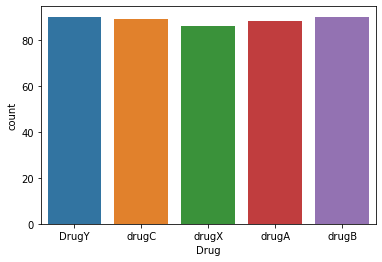

In [224]:
sns.countplot(y_res)

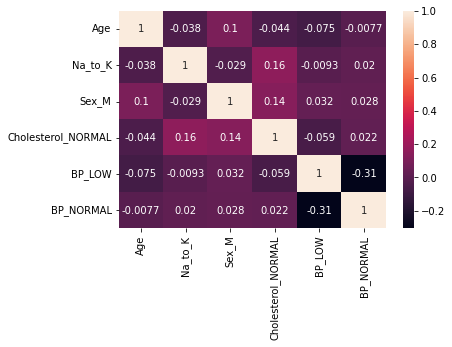

In [210]:
sns.heatmap(X_res.corr(),annot=True)

<h2> split data

In [211]:
from sklearn.model_selection import train_test_split


In [218]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y, test_size=0.33, random_state=43)

# Naive Bayes

In [219]:
from sklearn.naive_bayes import GaussianNB

In [220]:
model = GaussianNB()

In [221]:
model.fit(X_train,y_train)

GaussianNB()

In [222]:
model.score(X_test,y_test)

0.9183673469387755

In [223]:
model.score(X_train,y_train)

0.8783783783783784

<h1> why naive bayes ?
<h6><li> the data was very small with small features so we need low variant model 
<li> the corrlation between the features and each other was very law and this is how naive work